<a href="https://colab.research.google.com/github/XingxinHE/Python-for-Data-Analysis-Notes/blob/master/10_1_GroupBy_Mechanics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

Hadley Wickham发明了 split-apply-combine这个workflow

具体是

1#根据DF或Series里面得key来split，即根据key来分组

2#对这些分组出来的数据进行处理

3#经处理后，可以combine成为新数据

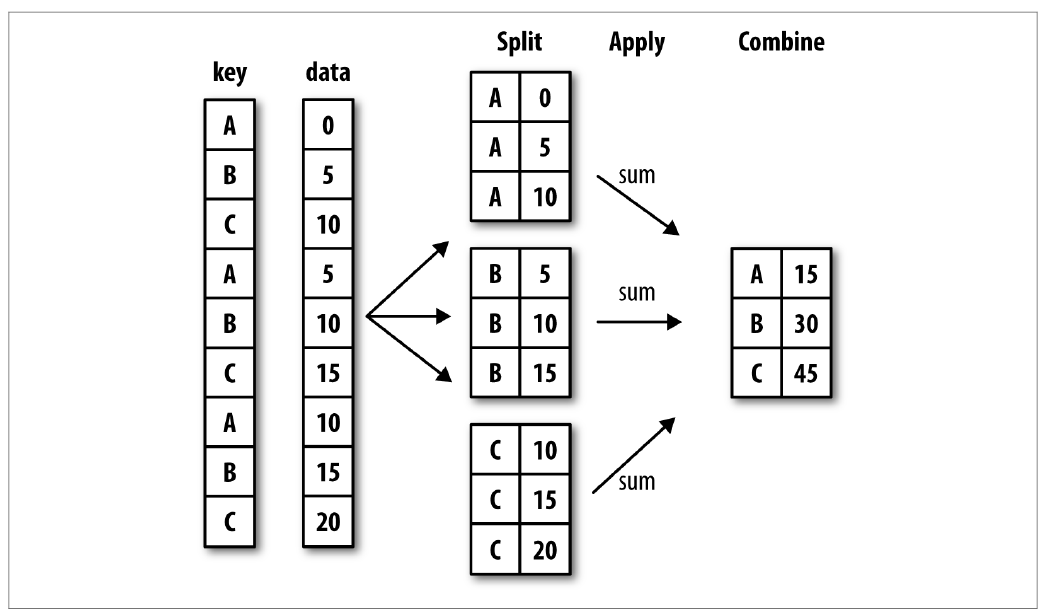

In [2]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
          'key2' : ['one', 'two', 'one', 'two', 'one'],
          'data1' : np.random.randn(5),
          'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,0.006093,-0.552249
1,a,two,-1.366890,0.323725
2,b,one,1.615556,1.047026
3,b,two,0.063408,-0.029322
4,a,one,-0.134497,1.064322


例子1 - 根据单个key来group

In [5]:
#任务是看key1里面a和b分别的data1的平均值
grouped = df['data1'].groupby(df['key1'])
grouped #此时这个grouped是一个叫做groupby object，它还没计算任何东西，但是却包含了几乎所有的信息，等效于第一步split

In [6]:
grouped.mean() #计算根据key1成组的数据的data1的平均值

key1
a   -0.498432
b    0.839482
Name: data1, dtype: float64

例子2 - 根据多个key进行group，会得到hierarchical data

In [9]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean() #注意这里的groupby pass in的是一个list（因为有俩）
means

key1  key2
a     one    -0.064202
      two    -1.366890
b     one     1.615556
      two     0.063408
Name: data1, dtype: float64

In [10]:
means.unstack()

key2,one,two
key1,,
a,-0.064202,-1.366890
b,1.615556,0.063408


例子3 - 根据不是DF内部的key值来group？！

前提是它们长度一致

In [11]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])

df['data1'].groupby([states, years]).mean()

California  2005   -1.366890
            2006    1.615556
Ohio        2005    0.034751
            2006   -0.134497
Name: data1, dtype: float64

例子4 - DF内部groupby

上文提及都是自己state一个键值，然后根据他groupby,以下这种方式就是我之前自学查doc的方法，在DF内部的groupby

In [12]:
# 直接 df.groupby()
df.groupby('key1').mean()

,data1,data2
key1,,
a,-0.498432,0.278599
b,0.839482,0.508852


这种syntax比较舒服和熟悉，同时可以发现这里结果没有key2 ？

按理来说它也会出现的。那是因为groupby的应为numerical data

In [13]:
# 多个键值
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one  -0.064202  0.256036
     two  -1.366890  0.323725
b    one   1.615556  1.047026
     two   0.063408 -0.029322

例子5 - 查看groupby之后的各个值的数目

In [14]:
df.groupby(['key1','key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

## Iterating Over Groups

1# iterate one key

In [15]:
for name, group in df.groupby('key1'):
  print(name) #第一个参数是键值，即根据什么来group
  print(group) #第二个即是group的所有信息

#所以呈现出来的是以键值为组，分别每一条都打印出来包含的信息

a
  key1 key2     data1     data2
0    a  one  0.006093 -0.552249
1    a  two -1.366890  0.323725
4    a  one -0.134497  1.064322
b
  key1 key2     data1     data2
2    b  one  1.615556  1.047026
3    b  two  0.063408 -0.029322


2# iterate多个key

In [16]:
for (k1,k2), group in df.groupby(['key1','key2']):
  print((k1,k2)) #多个key的话，则可pass in 一个tuple
  print(group)

('a', 'one')
  key1 key2     data1     data2
0    a  one  0.006093 -0.552249
4    a  one -0.134497  1.064322
('a', 'two')
  key1 key2    data1     data2
1    a  two -1.36689  0.323725
('b', 'one')
  key1 key2     data1     data2
2    b  one  1.615556  1.047026
('b', 'two')
  key1 key2     data1     data2
3    b  two  0.063408 -0.029322


将groupby变成dict

In [17]:
pieces = dict(list(df.groupby('key1')))

In [18]:
pieces

{'a':   key1 key2     data1     data2
 0    a  one  0.006093 -0.552249
 1    a  two -1.366890  0.323725
 4    a  one -0.134497  1.064322, 'b':   key1 key2     data1     data2
 2    b  one  1.615556  1.047026
 3    b  two  0.063408 -0.029322}

In [19]:
pieces['b']

,key1,key2,data1,data2
2,b,one,1.615556,1.047026
3,b,two,0.063408,-0.029322


Grouping by columns!! 很强

In [20]:
# 假设我们要groupby datatype
df.dtypes

key1      object
key2      object
data1    float64
data2    float64
dtype: object

In [22]:
grouped_dtypes = df.groupby(df.dtypes, axis=1)
grouped_dtypes

In [23]:
for dtype, group in grouped_dtypes:
  print(dtype)
  print(group)

#看到下面可以根据dtype来打印

float64
      data1     data2
0  0.006093 -0.552249
1 -1.366890  0.323725
2  1.615556  1.047026
3  0.063408 -0.029322
4 -0.134497  1.064322
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


## Selecting a Column or Subset of Columns

df.groupby('key1')['data1']

df.groupby('key1')[['data2']]


上下两种写法都是等效的，个人偏好前者


df['data1'].groupby(df['key1'])

df[['data2']].groupby(df['key1'])

In [24]:
#举个例子，根据k1,k2，group之后，想查看data2的平均值
df.groupby(['key1','key2'])[['data2']].mean()

data2
key1 key2          
a    one   0.256036
     two   0.323725
b    one   1.047026
     two  -0.029322

## Grouping with Dicts and Series

In [25]:
people = pd.DataFrame(np.random.randn(5, 5),
            columns=['a', 'b', 'c', 'd', 'e'],
            index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.iloc[2:3, [1, 2]] = np.nan # Add a few NA values

people

,a,b,c,d,e
Joe,0.853594,-0.469740,-0.097151,1.223824,-0.100937
Steve,-0.679653,0.275039,-1.532426,-1.002928,2.112794
Wes,0.343205,NaN,NaN,1.008522,-1.510271
Jim,0.468191,-0.675834,0.721420,-1.528349,0.157065
Travis,1.134128,-0.245643,0.119609,0.211405,-0.136670


In [26]:
# 在碰到数据处理的时候，经常需要将某一些column变成另外一些数值
# 比如说我在意大利买的salami，有很多不同种类的salami
# 如果我要根据把不同名字的salami变成猪肉，牛肉，羊肉这些，就可以用到mapping这个方法

# 假设要把上面的的abcde变成颜色

mapping = {'a':'red', 'b':'red', 'c':'blue', 'd':'blue', 'e':'red', 'f':'orange'}
#这里特意设置一下把一个不需要用到的键值'f'也写上，就是为了证明没用到也没关系

In [27]:
by_column = people.groupby(mapping, axis=1)
by_column.sum()
#可以看到red是原本的a,b,e三个column的值相加，如下

,blue,red
Joe,1.126672,0.282918
Steve,-2.535353,1.708180
Wes,1.008522,-1.167066
Jim,-0.806929,-0.050577
Travis,0.331014,0.751815


In [28]:
# 以上是mapping dict，也可mapping series
map_series = pd.Series(mapping)
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [29]:
people.groupby(map_series, axis=1).count()
#red有3个，证明就是column a,b,e相加

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


## Grouping with Functions

In [30]:
# 假设要根据字节长度去group
# 则可直接pass一个function进去groupby()里面

people.groupby(len).sum()
#3是Joe,Wes,Jim, 5是Steve， 6是Travis

,a,b,c,d,e
3,1.664990,-1.145573,0.624268,0.703997,-1.454143
5,-0.679653,0.275039,-1.532426,-1.002928,2.112794
6,1.134128,-0.245643,0.119609,0.211405,-0.136670


In [31]:
# 可以把function和array,dict,series等mix在一起

key_list = ['one', 'one', 'one', 'two', 'two']

people.groupby([len, key_list]).min()
#也就相当于map这些值给之前的df

a         b         c         d         e
3 one  0.343205 -0.469740 -0.097151  1.008522 -1.510271
  two  0.468191 -0.675834  0.721420 -1.528349  0.157065
5 one -0.679653  0.275039 -1.532426 -1.002928  2.112794
6 two  1.134128 -0.245643  0.119609  0.211405 -0.136670

## Grouping by Index Labels

In [32]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                   [1, 3, 5, 1, 3]],
                   names=['cty', 'tenor'])
hier_df = pd.DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0     -0.803656  0.802005  0.992042 -0.829930  0.543359
1      0.827922 -0.922737  0.824573 -0.622940  1.171066
2      0.088854 -0.785234 -0.697562 -0.221781  0.003234
3     -0.742333  1.100075  0.930965  0.329529  0.220144

In [33]:
# groupby level，可以把level pass进去
# 得出来以city为group
hier_df.groupby(level='cty', axis=1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3
